# Philly Parking Tickets

[TidyTuesday 2019-12-03](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-12-03)

**Contents:**

* [Data](#Data)
* [Tickets throughout the year](#Tickets-throughout-the-year)
* [Tickets by location](#Tickets-by-location)
* [Tickets by issuing agency](#Tickets-by-issuing-agency)

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from uszipcode import SearchEngine

In [2]:
pd.set_option('display.max_columns', None)

## Data

In [3]:
data = (
    pd.read_csv(
        'https://raw.githubusercontent.com/rfordatascience/tidytuesday/'
        'master/data/2019/2019-12-03/tickets.csv',
        parse_dates=['issue_datetime'])
    .rename(columns={'zip_code':'zip'})
    .dropna()
    .assign(zip=lambda x: x.zip.astype(int).astype(str))
)
data

,violation_desc,issue_datetime,fine,issuing_agency,lat,lon,zip
0,BUS ONLY ZONE,2017-12-06 12:29:00+00:00,51,PPA,40.035503,-75.081110,19149
1,STOPPING PROHIBITED,2017-10-16 18:03:00+00:00,51,PPA,40.025712,-75.222495,19127
2,OVER TIME LIMIT,2017-11-02 22:09:00+00:00,26,PPA,40.025792,-75.222557,19127
3,OVER TIME LIMIT,2017-11-05 20:19:00+00:00,26,PPA,40.025898,-75.222708,19127
4,STOP PROHIBITED CC,2017-10-17 06:58:00+00:00,76,PPA,39.956170,-75.166025,19102
...,...,...,...,...,...,...,...
1260885,METER EXPIRED,2017-12-19 14:49:00+00:00,26,PPA,40.037772,-75.172608,19144
1260886,EXPIRED INSPECTION,2017-12-20 09:04:00+00:00,41,PPA,39.995958,-75.139382,19133
1260887,METER EXPIRED CC,2017-12-23 08:25:00+00:00,36,PPA,39.963310,-75.168218,19130
1260889,HP RESERVED SPACE,2017-12-20 09:41:00+00:00,301,PPA,39.945860,-75.155208,19107


### Geometry

In [4]:
# https://gist.github.com/jefffriesen/6892860
! wget -nc https://gist.github.com/jefffriesen/6892860/raw/e1f82336dde8de0539a7bac7b8bc60a23d0ad788/zips_us_topo.json

File ‘zips_us_topo.json’ already there; not retrieving.



In [5]:
geo = gpd.read_file('zips_us_topo.json')
geo

,id,name,zip,state,geometry
0,None,MT MEADOWS AREA,00012,CA,"POLYGON ((-120.84386 40.25070, -121.06344 40.2..."
1,None,WEST PIMA COUNTY,00014,AZ,"POLYGON ((-113.33194 32.03795, -113.33194 32.5..."
2,None,CORONADO NTL FOREST,00015,AZ,"POLYGON ((-110.81256 32.30559, -110.87612 32.3..."
3,None,SEQUOIA NATIONAL FOREST,00016,CA,"POLYGON ((-118.33604 35.61647, -118.26092 35.4..."
4,None,NORTHEAST FRESNO COUNTY,00017,CA,"POLYGON ((-119.26636 36.99187, -119.27214 37.0..."
...,...,...,...,...,...
28630,None,WALLA WALLA,99362,WA,"POLYGON ((-118.63651 46.22812, -118.63651 46.2..."
28631,None,WASHTUCNA,99371,WA,"POLYGON ((-118.34182 46.73863, -118.51517 46.7..."
28632,None,ANATONE,99401,WA,"POLYGON ((-117.14569 46.13395, -117.01856 46.2..."
28633,None,ASOTIN,99402,WA,"POLYGON ((-117.18614 45.99765, -117.12835 46.0..."


### Other zipcode data

In [6]:
zip_search = SearchEngine(simple_zipcode=True)

In [7]:
zip_data = (
    pd.DataFrame([
        zip_search.by_zipcode(z).to_dict()
        for z in data.zip.drop_duplicates().sort_values()])
    .rename(columns={'zipcode':'zip'})
)
print(zip_data.shape)
zip_data.head()

(50, 24)


,zip,zipcode_type,major_city,post_office_city,common_city_list,county,state,lat,lng,timezone,radius_in_miles,area_code_list,population,population_density,land_area_in_sqmi,water_area_in_sqmi,housing_units,occupied_housing_units,median_home_value,median_household_income,bounds_west,bounds_east,bounds_north,bounds_south
0,19102,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Mid City East, Middle City East...",Philadelphia County,PA,39.953,-75.165,Eastern,0.681818,"[267, 215, 484, 610]",4705.0,24914.0,0.19,0.00,3513.0,3053.0,311600.0,76962.0,-75.169340,-75.161959,39.959815,39.945231
1,19103,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Mid City West, Middle City West...",Philadelphia County,PA,39.950,-75.170,Eastern,0.738636,"[215, 267, 610, 484]",21908.0,34284.0,0.64,0.01,16612.0,14776.0,428400.0,63709.0,-75.183288,-75.165374,39.960795,39.945591
2,19104,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Phila]",Philadelphia County,PA,39.970,-75.200,Eastern,2.000000,"[215, 267]",51808.0,17232.0,3.01,0.13,20039.0,17381.0,108500.0,19236.0,-75.214018,-75.179071,39.977791,39.941116
3,19106,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Phila, William Penn Annex East,...",Philadelphia County,PA,39.950,-75.150,Eastern,0.795455,"[267, 484, 215]",11740.0,14527.0,0.81,0.40,7576.0,6714.0,453400.0,93720.0,-75.155169,-75.130404,39.960209,39.928886
4,19107,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Phila, William Penn Annex West,...",Philadelphia County,PA,39.950,-75.160,Eastern,0.738636,"[215, 267, 484, 610]",14875.0,27085.0,0.55,0.00,8400.0,7619.0,306200.0,44402.0,-75.165299,-75.151102,39.959571,39.943615


## Tickets throughout the year

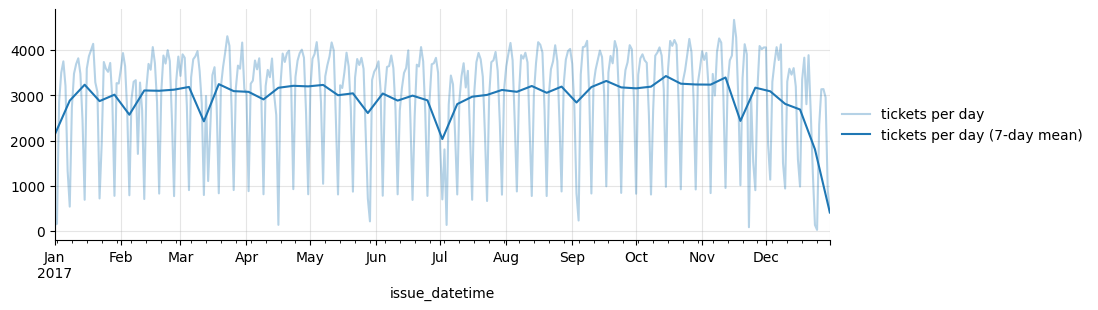

In [8]:
fig, ax = plt.subplots(figsize=(10,3))
data.set_index('issue_datetime').resample('1d').size().plot(ax=ax, alpha=.33, label='tickets per day')
data.set_index('issue_datetime').resample('1d').size().resample('7d').mean().plot(ax=ax, color='C0', label='tickets per day (7-day mean)')
ax.legend(loc='center left', bbox_to_anchor=[1, .5], frameon=False)
ax.grid()

## Tickets by location

In [9]:
zip_ticket_counts = data.groupby('zip').size().rename('num_tickets').reset_index().merge(zip_data)
print(zip_ticket_counts.shape)
zip_ticket_counts.head()

(50, 25)


,zip,num_tickets,zipcode_type,major_city,post_office_city,common_city_list,county,state,lat,lng,timezone,radius_in_miles,area_code_list,population,population_density,land_area_in_sqmi,water_area_in_sqmi,housing_units,occupied_housing_units,median_home_value,median_household_income,bounds_west,bounds_east,bounds_north,bounds_south
0,19102,36813,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Mid City East, Middle City East...",Philadelphia County,PA,39.953,-75.165,Eastern,0.681818,"[267, 215, 484, 610]",4705.0,24914.0,0.19,0.00,3513.0,3053.0,311600.0,76962.0,-75.169340,-75.161959,39.959815,39.945231
1,19103,127325,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Mid City West, Middle City West...",Philadelphia County,PA,39.950,-75.170,Eastern,0.738636,"[215, 267, 610, 484]",21908.0,34284.0,0.64,0.01,16612.0,14776.0,428400.0,63709.0,-75.183288,-75.165374,39.960795,39.945591
2,19104,102438,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Phila]",Philadelphia County,PA,39.970,-75.200,Eastern,2.000000,"[215, 267]",51808.0,17232.0,3.01,0.13,20039.0,17381.0,108500.0,19236.0,-75.214018,-75.179071,39.977791,39.941116
3,19106,70672,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Phila, William Penn Annex East,...",Philadelphia County,PA,39.950,-75.150,Eastern,0.795455,"[267, 484, 215]",11740.0,14527.0,0.81,0.40,7576.0,6714.0,453400.0,93720.0,-75.155169,-75.130404,39.960209,39.928886
4,19107,114318,Standard,Philadelphia,"Philadelphia, PA","[Philadelphia, Phila, William Penn Annex West,...",Philadelphia County,PA,39.950,-75.160,Eastern,0.738636,"[215, 267, 484, 610]",14875.0,27085.0,0.55,0.00,8400.0,7619.0,306200.0,44402.0,-75.165299,-75.151102,39.959571,39.943615


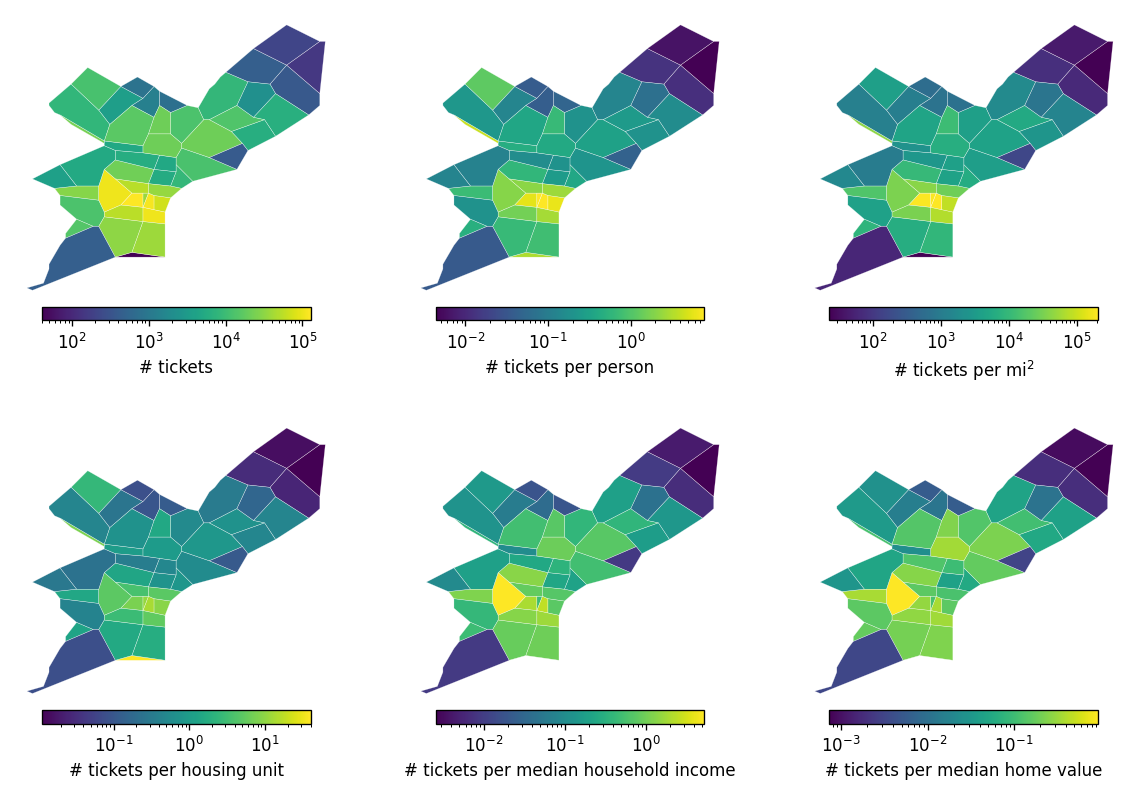

In [10]:
rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(4*cols, 4*rows), dpi=120)
d = geo.merge(zip_ticket_counts)
d[0] = d.num_tickets
d[1] = d.num_tickets / d.population
d[2] = d.num_tickets / d.land_area_in_sqmi
d[3] = d.num_tickets / d.housing_units
d[4] = d.num_tickets / d.median_household_income
d[5] = d.num_tickets / d.median_home_value
descs = [
    '# tickets', '# tickets per person', '# tickets per mi$^2$',
    '# tickets per housing unit', '# tickets per median household income',
    '# tickets per median home value'
]
for (i, (ax, desc)) in enumerate(zip(axs.ravel(), descs)):
    d.boundary.plot(color='w', lw=.25, alpha=.5, ax=ax)
    mi, ma = d[i].min(), d[i].max()
    d.plot(
        i, ax=ax,
        norm=plt.matplotlib.colors.LogNorm(mi, ma),
        legend=True, legend_kwds=dict(
            label=desc, orientation='horizontal', fraction=.04, pad=0.01,
        )
    )
    ax.plot(np.nan)
    ax.set(aspect='equal')
    ax.axis('off');
for ax in axs.ravel():
    if not (ax.patches or ax.lines):
        ax.set(visible=False)

## Tickets by issuing agency

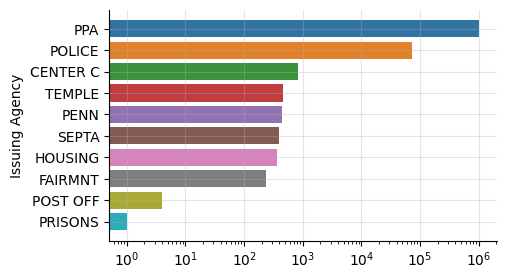

In [11]:
fig, ax = plt.subplots(figsize=(5,3))
d = data.issuing_agency.value_counts().reset_index()
sns.barplot('issuing_agency', 'index', data=d)
ax.semilogx()
ax.set(xlabel='', ylabel='Issuing Agency')
ax.grid()

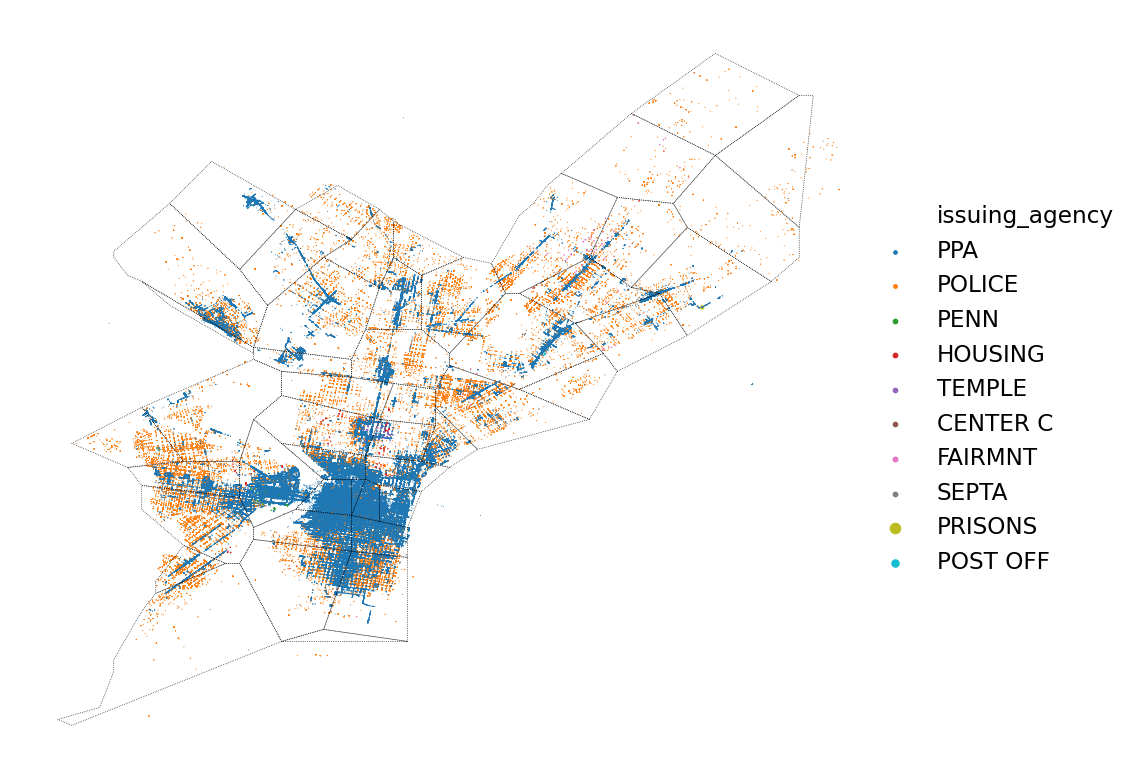

In [15]:
fig, ax = plt.subplots(dpi=200)
d = geo.merge(zip_data)
d.boundary.plot(ax=ax, color='k', lw=.25, ls=':')
d = data.copy()#.sample(frac=.1)
ax.set(xlim=ax.get_xlim(), ylim=ax.get_ylim())
s = 10 / np.log2(1 + data.issuing_agency.value_counts())
sns.scatterplot('lon', 'lat', hue='issuing_agency', data=d,
                marker='.', size='issuing_agency', sizes=dict(s.items()), edgecolor='none')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='center left', bbox_to_anchor=[1,.5], frameon=False, prop=dict(size='small'))
ax.axis('off');

In [13]:
title = '| Most Common Tickets Issued By Each Agency |'
print(len(title) * '-')
print(title)
print(len(title) * '-')
(
    data
    .groupby('issuing_agency violation_desc'.split())
    .size().rename('num_tickets')
    .reset_index()
    .sort_values('issuing_agency num_tickets'.split(), ascending=(True,False))
    .groupby('issuing_agency')
    .head(3)
    .set_index('issuing_agency violation_desc'.split())
    .loc[s.index]
)

---------------------------------------------
| Most Common Tickets Issued By Each Agency |
---------------------------------------------


num_tickets
issuing_agency violation_desc                   
PPA            METER EXPIRED CC           257739
               METER EXPIRED              156918
               OVER TIME LIMIT            131102
POLICE         PARKING PROHBITED           14243
               EXPIRED INSPECTION          13462
               FIRE HYDRANT                 8009
CENTER C       STOP PROHIBITED CC            388
               DOUBLE PARKED  CC             170
               PARKING PROHBITED CC          131
TEMPLE         PARKING PROHBITED             189
               CORNER CLEARANCE               60
               STOPPING PROHIBITED            46
PENN           STOP PROHIBITED CC            130
               PARKING PROHBITED              76
               PARKING PROHBITED CC           63
SEPTA          STOPPING PROHIBITED           136
               PARKING PROHBITED              98
               BUS ONLY ZONE                  97
HOUSING        EXPIRED INSPECTION            135
               PARKING PROHBITED              55
               BUS ONLY ZONE                  32
FAIRMNT        EXPIRED INSPECTION            192
               SIDEWALK                       16
               BUS ONLY ZONE                   4
POST OFF       BLOCKING DRIVEWAY               4
PRISONS        BLOCKING DRIVEWAY               1

In [16]:
data[data.issuing_agency.eq('PPA')].violation_desc.value_counts().head(15)

METER EXPIRED CC        257739
METER EXPIRED           156918
OVER TIME LIMIT         131102
EXPIRED INSPECTION      103073
STOP PROHIBITED CC      101686
STOPPING PROHIBITED      37710
PARKING PROHBITED CC     37362
OVER TIME LIMIT CC       22316
PASSENGR LOADNG ZONE     21522
PARKING PROHBITED        21091
BUS ONLY ZONE            16020
HP RESERVED SPACE        10875
LOADING ZONE   CC        10740
BUS ONLY ZONE   CC        9061
FIRE HYDRANT              8223
Name: violation_desc, dtype: int64